In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
train_data = pd.read_csv("D:\\Folder\\DataSweat\\House-prices\\train.csv")
test_data = pd.read_csv("D:\\Folder\\DataSweat\\House-prices\\test.csv")
train_test_data = [train_data, test_data]

In [63]:
def fill_na(feature,x = False):
    train_data[feature].fillna("None",inplace = True)
    test_data[feature].fillna("None",inplace = True)
    if x == True:
        train_data.groupby(feature).SalePrice.mean().plot(kind = 'bar')
        plt.show()

def rel(data):
    corel = data.corr().index
    plt.figure(figsize = (20,20))
    corell=sns.heatmap(data[corel].corr(),annot = True,cmap = 'RdYlGn')

## Explore Data

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

### there are 1460 rows 
### how many are nulls in train data?

In [17]:
#finding no of null values and the column name which contains null value
#print("no of null values in each column of train set is\n",train_data.isna().sum())
c

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [26]:
nan_train_list = [key  for (key, value) in nan_train_dict.items() if value >= 1000]
nan_train_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

<b>we have <u>19</u> columns with null values and their name can be found in list nan_col,out of which 4 have more than 1000 null values and it is better to drop them  


### how many are nulls in train data?

In [22]:
#print("no of null values in each column of train set is\n",train_data.isna().sum())
nan_test_dict= {}
for i in test_data.columns:
    if(test_data[i].isna().sum() != 0):
        nan_test_dict[i] = test_data[i].isna().sum()
print("\nno of columns with null values are\n",len(nan_test_dict))   
nan_test_dict


no of columns with null values are
 33


{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

In [28]:
nan_test_list = [key  for (key, value) in nan_test_dict.items() if value >= 1000]
nan_test_list

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

<b>we have <u>33</u> columns with null values and their name can be found in list nan_val,out of which 4 have more than 1000 null values and the first thought would be to drop them. But we go through the meta data we would come to know that PoolQC is very useful. As most we know, having a pool in our house is a luxury and not all house have that and thats why we have NA. This feature can have a huge impact on the price similarly it would be a good idea to explore the data.

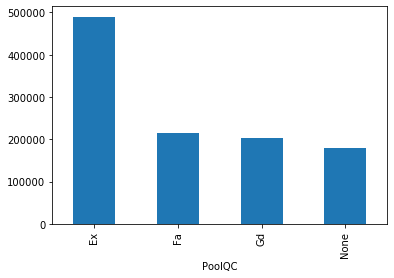

In [35]:
train_data['PoolQC'].fillna("None",inplace = True)
test_data['PoolQC'].fillna("None",inplace = True)
train_data.groupby('PoolQC').SalePrice.mean().plot(kind = 'bar')
plt.show()

### As you can see the mean price of EX is greater than others which have almost the same price. So PoolQC EX is important.


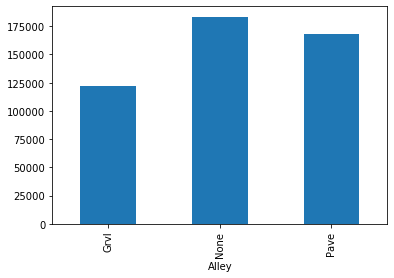

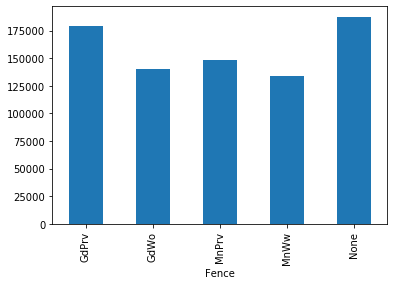

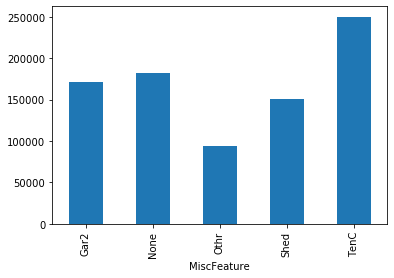

In [48]:
fill_na('Alley',True)
fill_na('Fence',True)
fill_na('MiscFeature',True)

In [56]:
nan_test_list = [key  for (key, value) in nan_test_dict.items() if value > 0 and value <=10]
nan_test_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [55]:
fill_na('BsmtQual')
fill_na('BsmtCond')
fill_na('BsmtExposure')
fill_na('BsmtFinType1')
fill_na('BsmtFinType2')
fill_na('GarageCond')
fill_na('GarageQual')
fill_na('GarageFinish')
fill_na('GarageType')


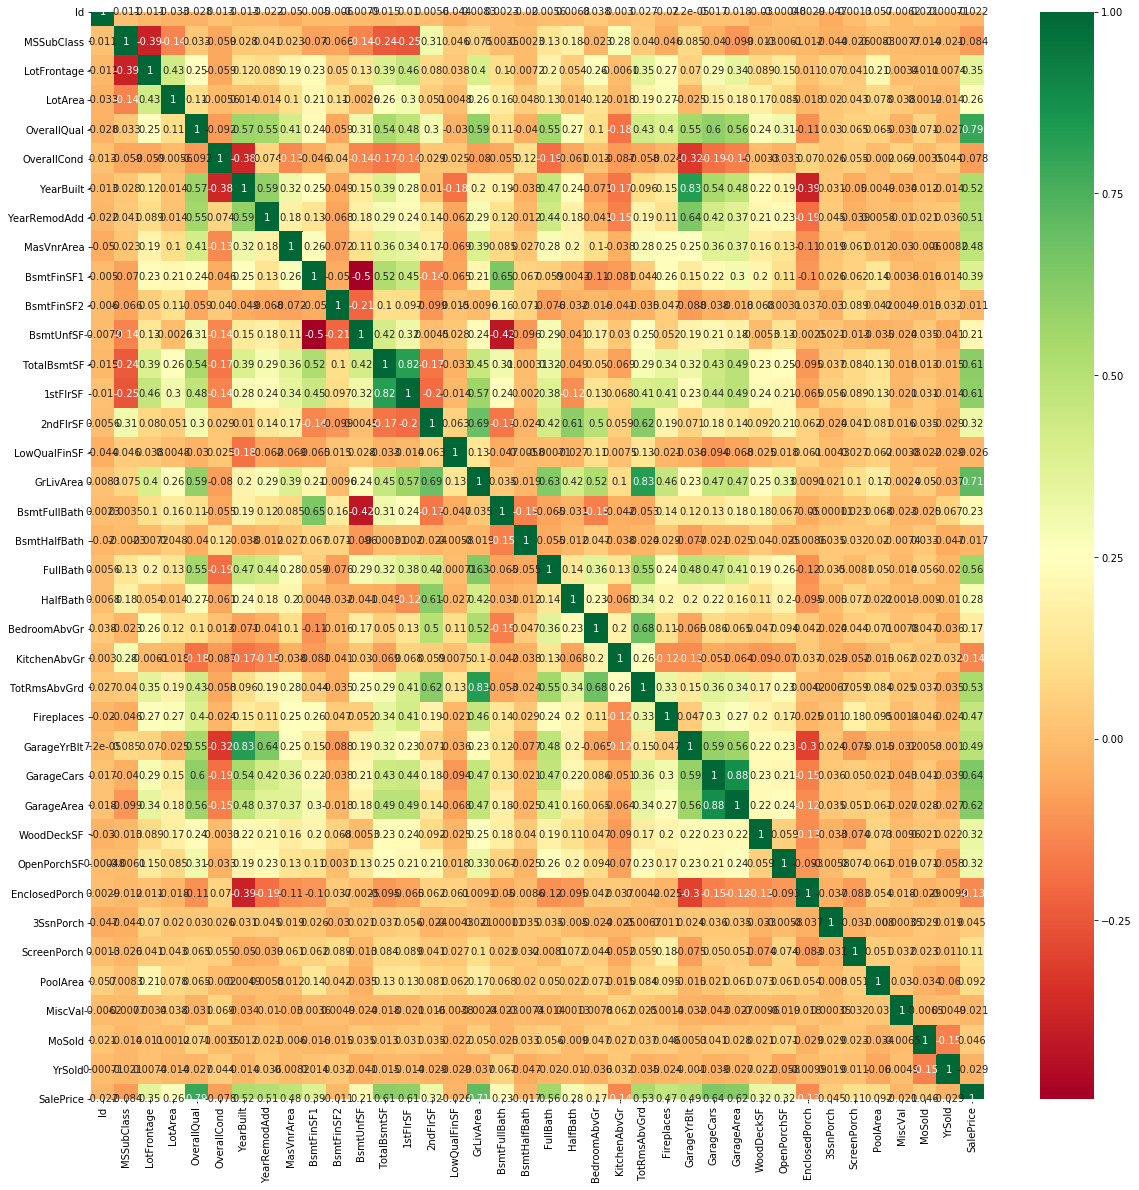

In [64]:
rel(train_data)

#### from the above heatmap we can see that all the features starting with "Garage" have high positive corelation. It doesnt make much sense to keep them all. Keeping one of them should be good enough. Among them I'm selecting 'GarageCars' as it has the highest corelation with 'SalePrice' 

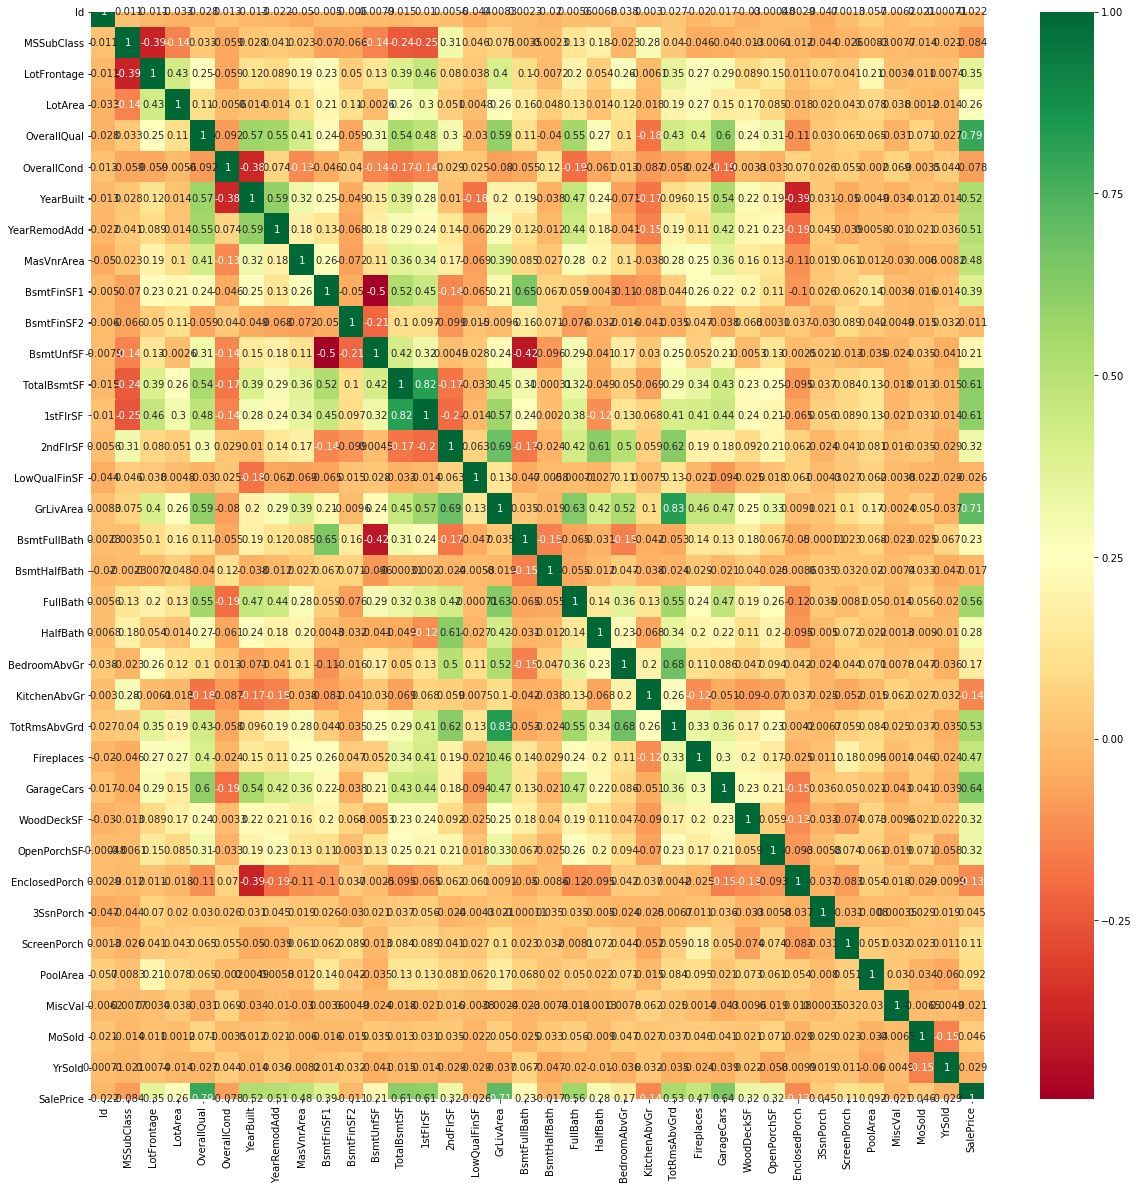

In [66]:
train_data.drop(['GarageYrBlt','GarageArea'],axis = 1,inplace = True)
test_data.drop(['GarageYrBlt','GarageArea'],axis = 1,inplace = True)
rel(train_data)

In [87]:
train_data.corr()['SalePrice']
#dropping all the less corelated values with saleprice
l=['Id','MSSubClass','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
train_data.drop(l,axis = 1, inplace = True)
test_data.drop(l,axis = 1, inplace = True)

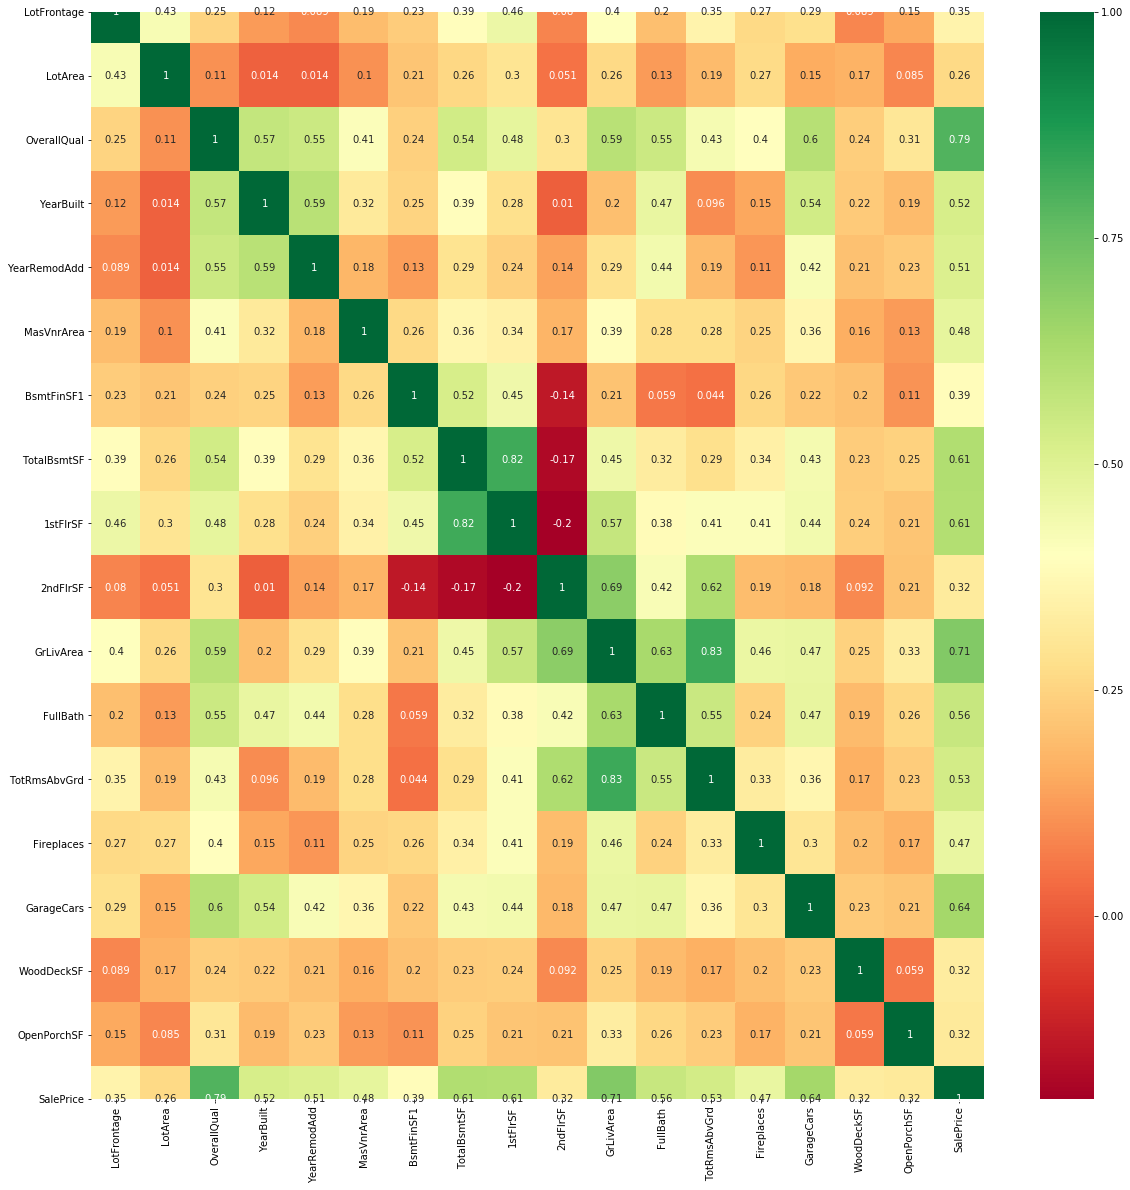

In [88]:
rel(train_data)

In [89]:
nan_train_dict ={}
for i in train_data.columns:
    if(train_data[i].isna().sum() != 0):
        nan_train_dict[i] = train_data[i].isna().sum()
nan_train_dict

{'LotFrontage': 259, 'MasVnrType': 8, 'MasVnrArea': 8, 'Electrical': 1}

In [8]:
#for dataset in train_test_data:
#print(test_data['MasVnrType'].mode(),'\n')
#print(train_data.groupby('MasVnrType')['MasVnrArea'].mean())
#print(test_data.groupby('MasVnrType')['MasVnrArea'].mean())
train_data['MasVnrType'].fillna("None",inplace = True)
test_data['MasVnrType'].fillna("None",inplace = True)

In [90]:
train_data['MasVnrArea'].fillna(train_data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace = True)
test_data['MasVnrArea'].fillna(train_data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace = True)

In [12]:
#quality = train_data[['PavedDrive','SalePrice']]
#quality.groupby('PavedDrive').mean().plot.bar()
#print(quality.groupby('PavedDrive').mean())

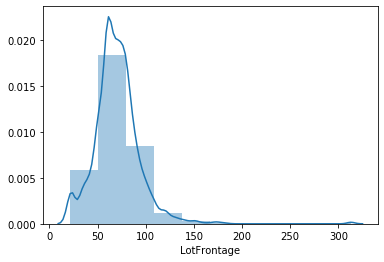

In [91]:
A=train_data.LotFrontage
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True,bins = 10)

In [92]:
train_data['LotFrontage'].fillna(train_data.LotFrontage.mean(),inplace = True)
test_data['LotFrontage'].fillna(train_data.LotFrontage.mean(),inplace = True)

In [93]:
print(train_data['LotFrontage'].isna().sum())
print(test_data['LotFrontage'].isna().sum())

0
0


In [94]:
print(train_data['BsmtQual'].value_counts())
print(test_data['BsmtQual'].value_counts())
train_data.BsmtQual.mode()[0]

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      634
Gd      591
Ex      137
Fa       53
None     44
Name: BsmtQual, dtype: int64


'TA'

In [95]:
print(train_data['BsmtCond'].value_counts())
print(test_data['BsmtCond'].value_counts())
train_data['BsmtCond'].fillna("None",inplace = True)
test_data['BsmtCond'].fillna("None",inplace = True)

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
TA      1295
Fa        59
Gd        57
None      45
Po         3
Name: BsmtCond, dtype: int64


In [96]:
print(train_data['BsmtExposure'].value_counts())
print(test_data['BsmtExposure'].value_counts())
train_data['BsmtExposure'].fillna("None",inplace = True)
test_data['BsmtExposure'].fillna("None",inplace = True)

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
No      951
Av      197
Gd      142
Mn      125
None     44
Name: BsmtExposure, dtype: int64


In [97]:
print(train_data['BsmtFinType2'].value_counts())
print(test_data['BsmtFinType2'].value_counts())
train_data['BsmtFinType2'].fillna("None",inplace = True)
test_data['BsmtFinType2'].fillna("None",inplace = True)

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
Unf     1237
Rec       51
None      42
LwQ       41
BLQ       35
ALQ       33
GLQ       20
Name: BsmtFinType2, dtype: int64


In [98]:
print(train_data['Electrical'].value_counts())
print(test_data['Electrical'].value_counts())
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace = True)
test_data['Electrical'].fillna(test_data['Electrical'].mode()[0],inplace = True)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


In [99]:
print(train_data['GarageType'].value_counts())
print(test_data['GarageType'].value_counts())
train_data['GarageType'].fillna("None",inplace = True)
test_data['GarageType'].fillna("None",inplace = True)

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     853
Detchd     392
BuiltIn     98
None        76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64


In [101]:
print(train_data['GarageFinish'].value_counts())
print(test_data['GarageFinish'].value_counts())
train_data['GarageFinish'].fillna("None",inplace = True)
test_data['GarageFinish'].fillna("None",inplace = True)

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64
Unf     625
RFn     389
Fin     367
None     78
Name: GarageFinish, dtype: int64


In [102]:
print(train_data['GarageQual'].value_counts())
print(test_data['GarageQual'].value_counts())
train_data['GarageQual'].fillna("None",inplace = True)
test_data['GarageQual'].fillna("None",inplace = True)

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
TA      1293
None      78
Fa        76
Gd        10
Po         2
Name: GarageQual, dtype: int64


In [103]:
print(train_data['GarageCond'].value_counts())
print(test_data['GarageCond'].value_counts())
train_data['GarageCond'].fillna("None",inplace = True)
test_data['GarageCond'].fillna("None",inplace = True)

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64
TA      1328
None      78
Fa        39
Po         7
Gd         6
Ex         1
Name: GarageCond, dtype: int64


In [104]:
print(train_data['BsmtFinType1'].value_counts())
print(test_data['BsmtFinType1'].value_counts())
train_data['BsmtFinType1'].fillna("None",inplace = True)
test_data['BsmtFinType1'].fillna("None",inplace = True)

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
GLQ     431
Unf     421
ALQ     209
Rec     155
BLQ     121
LwQ      80
None     42
Name: BsmtFinType1, dtype: int64


In [105]:
train_data['FireplaceQu'].fillna("None",inplace = True)
test_data['FireplaceQu'].fillna("None",inplace = True)

In [34]:
import seaborn as sns

In [108]:
nan_test_dict= {}
for i in test_data.columns:
    if(test_data[i].isna().sum() != 0):
        nan_test_dict[i] = test_data[i].isna().sum()
print("\nno of columns with null values are\n",len(nan_test_dict))   
nan_test_dict


no of columns with null values are
 11


{'MSZoning': 4,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'BsmtFinSF1': 1,
 'TotalBsmtSF': 1,
 'KitchenQual': 1,
 'Functional': 2,
 'GarageCars': 1,
 'SaleType': 1}

In [111]:
test_data.GarageCars.value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [112]:
test_data['GarageCars'].fillna(2,inplace = True)

In [129]:
nan_test_dict= {}
for i in test_data.columns:
    if(test_data[i].isna().sum() != 0):
        nan_test_dict[i] = test_data[i].isna().sum()
print("\nno of columns with null values are\n",len(nan_test_dict))   
nan_test_dict


no of columns with null values are
 0


{}

In [114]:
test_data.Exterior1st.fillna(test_data.Exterior1st.mode()[0],inplace = True)
test_data.Exterior2nd.fillna(test_data.Exterior2nd.mode()[0],inplace = True)

In [117]:
test_data.KitchenQual.fillna(test_data.KitchenQual.mode()[0],inplace = True)
test_data.KitchenQual.value_counts()

TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [118]:
test_data.MSZoning.fillna(test_data.MSZoning.mode()[0],inplace = True)
test_data.MSZoning.isna().sum()

0

In [122]:
test_data.Utilities.fillna("AllPub",inplace = True)
test_data.TotalBsmtSF.fillna(test_data.TotalBsmtSF.mean(),inplace = True)
test_data.Functional.fillna("Typ",inplace = True)

In [128]:
#test_data.SaleType.fillna(test_data.SaleType.mode()[0],inplace=True)
test_data.MasVnrType.fillna(test_data.MasVnrType.mode()[0],inplace = True)

In [141]:
colsn=[]  
for i in test_data.columns:
    if(train_data[i].dtype == 'object'):
        colsn.append(i)
len(colsn)


43

In [131]:
test_data.shape

(1459, 60)

In [132]:
train_data.shape

(1460, 61)

## Encoding

In [133]:
from sklearn import preprocessing

In [204]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [58]:
"""l = ['a','b','s','a']
le = preprocessing.LabelEncoder()
le.fit(l)
list(le.transform(l))
l = []
for i in test_data['SaleType']:
    l.append(i)
y = list(le.fit_transform(l))"""

"l = ['a','b','s','a']\nle = preprocessing.LabelEncoder()\nle.fit(l)\nlist(le.transform(l))\nl = []\nfor i in test_data['SaleType']:\n    l.append(i)\ny = list(le.fit_transform(l))"

In [206]:
le = preprocessing.LabelEncoder()
for i in colsn:
    v =[]
    for j in test_copy[i]:
        v.append(j)
    
    test_copy[i].replace(v,list(le.fit_transform(v)),inplace = True)

In [155]:
#test_copy.dtypes
train_copy.corr()['SalePrice']

MSZoning        -0.166872
LotFrontage      0.334901
Street           0.041036
Alley            0.083121
LotShape        -0.255580
LandContour      0.015453
Utilities       -0.014314
LotConfig       -0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
OverallQual      0.790982
RoofStyle        0.222405
RoofMatl         0.132383
MasVnrType       0.029658
MasVnrArea       0.477493
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.593734
BsmtCond         0.091503
BsmtExposure    -0.309043
BsmtFinType1    -0.098734
BsmtFinSF1       0.386420
BsmtFinType2     0.072717
TotalBsmtSF      0.613581
Heating         -0.098812
HeatingQC       -0.400178
CentralAir       0.251328
Electrical       0.234945
1stFlrSF         0.605852
GrLivArea        0.708624
FullBath         0.560664
KitchenQual     -0.589189
TotRmsAbvGrd     0.533723
Functional  

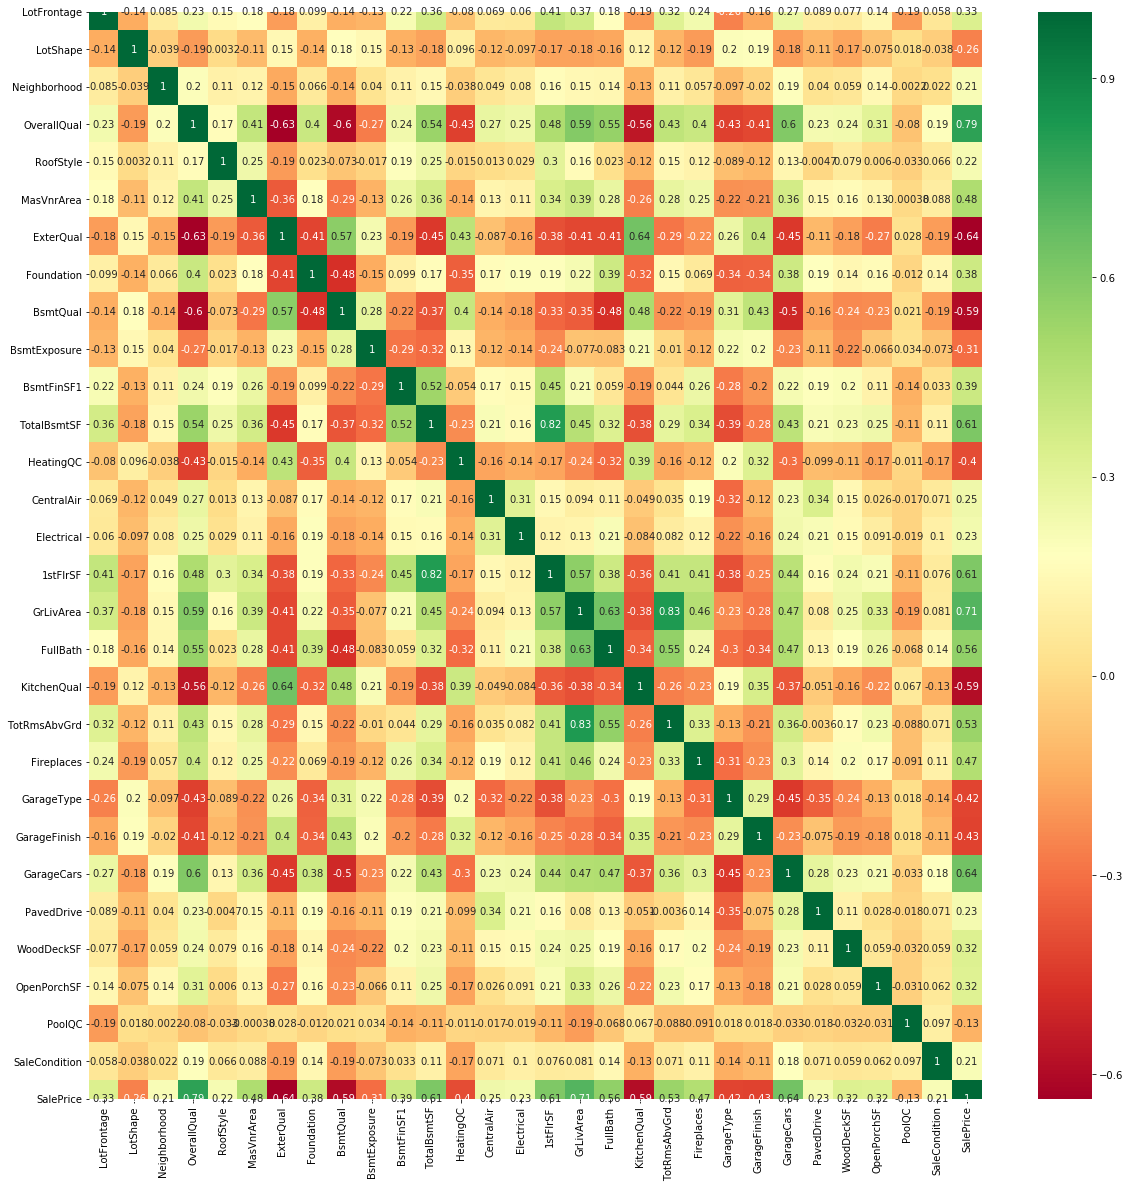

In [157]:
r = ['GarageQual','GarageCond','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','LotArea','2ndFlrSF']
r = ['Street','Alley','SaleType','MiscFeature','FireplaceQu','Functional','Heating','BsmtFinType2','BsmtFinType1','BsmtCond','ExterCond'
     ,'MasVnrType','RoofMatl','HouseStyle','BldgType','Utilities','LotConfig','LandSlope','LandContour','MSZoning','Condition1','Condition2']

train_copy.drop(['Fence'],axis = 1,inplace = True)
test_copy.drop(['Fence'],axis = 1,inplace = True)
rel(train_copy)


In [166]:
train_copy.MasVnrArea.fillna(train_copy.MasVnrArea.mean(),inplace = True)

In [158]:
train_copy.shape

(1460, 30)

In [159]:
test_copy.shape

(1459, 29)

In [160]:
target = train_copy.pop('SalePrice')

In [161]:
train_copy.shape

(1460, 29)

In [199]:
train_copy.drop(['SaleCondition','PavedDrive','Electrical','RoofStyle'],axis = 1,inplace = True)
test_copy.drop(['SaleCondition','PavedDrive','Electrical','RoofStyle'],axis = 1,inplace = True)

In [162]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import linear_model

In [202]:
rfc = RandomForestRegressor(n_estimators = 500)
rfc.fit(train_copy,target)
y_pred = rfc.predict(test_copy)
y_pred

array([123683.916, 158111.244, 174984.388, ..., 145516.19 , 110079.454,
       225653.51 ])

In [174]:
import xgboost
regressor=xgboost.XGBRegressor()


from sklearn.model_selection import RandomizedSearchCV


booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(train_copy,target)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  7.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:25:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=regressor,
            param_grid=hyperparameter_grid,
            cv=2, 
            scoring = 'neg_mean_absolute_error',n_jobs = 100,
            verbose = 5, 
            return_train_score = True,
            )
grid_cv.fit(xtrain,ytrain)

Fitting 2 folds for each of 3200 candidates, totalling 6400 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 615, in _queue_management_worker
    ready = wait(readers + worker_sentinels)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 868, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 800, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 101



In [175]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [176]:
cl = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
cl.fit(train_copy,target)
y_pred2 = cl.predict(test_copy)
y_pred2

[16:27:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([134727.03, 182858.27, 184202.92, ..., 149196.95, 125609.76,
       228852.05], dtype=float32)

In [191]:
#Linear Regression
lm = linear_model.LinearRegression()
model = lm.fit(train_copy,target)
y_pred3 = lm.predict(test_copy)
y_pred3

array([109045.95089754, 183437.98912768, 183610.10200551, ...,
       160868.79201089, 123859.27656442, 251759.13419881])

In [1]:
#for i in colsn:
 #   print(train_df[i].value_counts())

In [203]:
subb = pd.DataFrame({
        "Id": test_ID["Id"],
        "SalePrice": y_pred
    })
subb.to_csv('D:\\Folder\\DataSweat\\House-prices\\house_price3.csv', index=False)

In [71]:
#remove utilities 

In [167]:
test_copy.isna().sum()

LotFrontage      0
LotShape         0
Neighborhood     0
OverallQual      0
RoofStyle        0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinSF1       0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
PoolQC           0
SaleCondition    0
dtype: int64

In [172]:
test_ID = pd.read_csv("D:\\Folder\\DataSweat\\House-prices\\test.csv")